# Exploring News Biases in Local and National News
**November 5, 2021**  
- Edited by Malika Parkhomchuk, Jenny Chan, Asma Mardini and Zeynep Yalcin  


The First part of this notebook is about exploring Google News for biases when it comes to local news sources and national news sources. The Google News pages were collected with the `Selenium` package. 
The links to article were marked with the `"DY5T1d"` tag. 
Here are some of the functions that the notebook can be used to do:
- extract names page of articles from Google News
- extract name of news source of article
- extract the rank of the news source 

The Second part of this notebook is about replicating the data provided from the `R` software regarding local and national news and creating a figure using the Gini Index using `matplotlib`. 
The data from the original research was downloaded, alongside the Gini Index to make this possible. 
Here are some of the actions that the notebook can be used to do: 

- load the local and national original data sets
- get the Gini index of the search terms for local and national news  
- get the average of the Gini index 
- plot the Gini index for the unique search terms 

Here are some of the functions in this section that this notebook can be used to do: 
- return the gini co-efficient for a source found in the local or national data set 
- return the gini-coefficient with the associated unique term as a list 




# Part 1: Google News Replication 
## Step 1: Using Selenium and Scraping Google News 

In this step we will make sure that selenium is installed and can communicate with the Chrome browser. We will create a driverpath so that Selenium can communicate with our browser. 


In [3]:
import requests
from bs4 import BeautifulSoup as BS
import time

In [1]:
import selenium

Now we are creating a chrome instance and telling it to open a the web page with the Google News articles that Eni has provided us with:

In [17]:
mydriverpath = 'driver/chromedriver' 

In [15]:
from selenium import webdriver
driver = webdriver.Chrome(executable_path=mydriverpath)
driver.get('file:///Users/zeynoyalcin/Desktop/google_news_election.html')

NameError: name 'url_list' is not defined

In [10]:
driver.current_url

NameError: name 'driver' is not defined

We need to switch to the iframe that wraps all the elements, becasue otherwise you can't find them

In [6]:
driver.find_elements_by_tag_name("iframe")

<ipython-input-6-1ac29b64cf2a>:1: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  driver.find_elements_by_tag_name("iframe")


[]

In [7]:
#browser.switch_to.frame("iframe")

The links to the articles have this `"DY5T1d"` class name. We are creating a list of elements that have this class name so that we can get all the articles. Here we are finding all of the `<a>` elements with this class.

In [8]:
listOfAelements = driver.find_elements_by_class_name("DY5T1d")

<ipython-input-8-c2196f8416c6>:1: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  listOfAelements = driver.find_elements_by_class_name("DY5T1d")


In [9]:
len(listOfAelements)

104

Now we are extracting the actual links from `<href>` elements. The `<href>` element allows us to access the hyperlinks presents in a page. We get these attributes for each link and create a list of link present in the Google News page. 

In [10]:
listOfLinks = [link.get_attribute("href") for link in listOfAelements]

Then we are making sure this list is correct by inspecting the number of elements present in it. 

In [11]:
len(listOfLinks)

104

In [13]:
test = listOfLinks[25:50]
#test

This function goes through the list of links we have created by getting the `<href>` attribute and it itterates throgh each link to visit the page and get the actual link to the page instead of the hyper google news link. 

The `sleep` module is used to make sure that the browser is collecting through itteration and not opening all links at once. Once we have the link to the actual website we get the current url and add it to our new list of links. 

In [14]:
listof_newLinks= []
for link in listOfLinks: 
    driver.get(link)
    time.sleep(2)
    new_link = driver.current_url
    listof_newLinks.append(new_link)
    print(new_link)

https://fivethirtyeight.com/features/everything-you-need-to-know-about-the-2021-elections/
https://www.newsweek.com/glenn-youngkin-virginia-contesting-elections-marc-elias-lawyer-trump-1644357
https://www.washingtonpost.com/dc-md-va/2021/10/30/virginia-election-when-expect-results/
https://www.msnbc.com/opinion/virginia-election-spotlights-biden-s-flailing-party-n1282821
https://www.cnn.com/2021/11/01/politics/virginia-governor-race-democrats-trouble/index.html
https://www.npr.org/2021/11/01/1050291610/most-americans-trust-elections-are-fair-but-sharp-divides-exist-a-new-poll-finds
https://www.cnn.com/2021/10/31/politics/ballot-proposals-november-2021-election/index.html
https://www.gwhatchet.com/2021/11/01/getting-to-the-bottom-of-it-preparing-for-the-virginia-elections/
https://www.cavalierdaily.com/article/2021/10/chebili-students-should-prioritize-state-elections
https://www.inquirer.com/news/pennsylvania-elections-what-to-watch-november-2021-20211101.html
https://www.inquirer.com/

TimeoutException: Message: timeout: Timed out receiving message from renderer: 300.000
  (Session info: chrome=95.0.4638.69)
Stacktrace:
0   chromedriver                        0x000000010cdf5519 __gxx_personality_v0 + 577193
1   chromedriver                        0x000000010cd81663 __gxx_personality_v0 + 102387
2   chromedriver                        0x000000010c948d28 chromedriver + 171304
3   chromedriver                        0x000000010c9348c7 chromedriver + 88263
4   chromedriver                        0x000000010c9337c2 chromedriver + 83906
5   chromedriver                        0x000000010c933bcc chromedriver + 84940
6   chromedriver                        0x000000010c941371 chromedriver + 140145
7   chromedriver                        0x000000010c941f32 chromedriver + 143154
8   chromedriver                        0x000000010c94fa53 chromedriver + 199251
9   chromedriver                        0x000000010c952b3a chromedriver + 211770
10  chromedriver                        0x000000010c933eee chromedriver + 85742
11  chromedriver                        0x000000010c94f7d3 chromedriver + 198611
12  chromedriver                        0x000000010c9ad7a9 chromedriver + 583593
13  chromedriver                        0x000000010c99b0a3 chromedriver + 508067
14  chromedriver                        0x000000010c9715ae chromedriver + 337326
15  chromedriver                        0x000000010c9728d5 chromedriver + 342229
16  chromedriver                        0x000000010cdb175f __gxx_personality_v0 + 299247
17  chromedriver                        0x000000010cdc869a __gxx_personality_v0 + 393258
18  chromedriver                        0x000000010cdcdf5b __gxx_personality_v0 + 415979
19  chromedriver                        0x000000010cdc9a3a __gxx_personality_v0 + 398282
20  chromedriver                        0x000000010cda637c __gxx_personality_v0 + 253196
21  chromedriver                        0x000000010cde5458 __gxx_personality_v0 + 511464
22  chromedriver                        0x000000010cde55e1 __gxx_personality_v0 + 511857
23  chromedriver                        0x000000010cdfc968 __gxx_personality_v0 + 606968
24  libsystem_pthread.dylib             0x00007fff6e3d1109 _pthread_start + 148
25  libsystem_pthread.dylib             0x00007fff6e3ccb8b thread_start + 15


We are repeating the steps for the links after a certain amount of links has been visited because the browser tends to get stuck so breaking it up into chunks where selenium can keep runnning is very helpful. 

In [24]:
for link in listOfLinks[38:]: 
    driver.get(link)
    time.sleep(2)
    new_link = driver.current_url
    listof_newLinks.append(new_link)
    print(new_link)

https://www.postandcourier.com/politics/there-are-elections-tuesday-across-sc-including-in-charleston-mount-pleasant/article_e2a0c46c-3361-11ec-8e67-3bbf86f735de.html
https://kansasreflector.com/2021/11/01/history-recycled-in-this-years-kansas-school-board-elections/
https://www.wsj.com/articles/japanese-elections-fail-to-produce-gains-for-women-11635765296
https://www.hometownsource.com/monticello_times/opinion/school-board-elections-offer-valuable-volunteer-opportunities/article_c577d302-3a92-11ec-af43-eb3911d0edd7.html
https://www.iowastatedaily.com/news/iowa-state-university-november-2-election-local-voting-city-of-ames/article_7ac0892a-3a6b-11ec-9a07-637b3ec4f667.html
https://www.inquirer.com/news/two-pa-swing-counties-elections-could-offer-clues-year-ahead-20211029.html
https://www.yakimaherald.com/news/elections/yakima-county-election-turnout-about-15-friday-with-ballots-due-tuesday/article_ad4865fe-ef73-5027-aad5-e7c18265b5ab.html
https://www.cleveland.com/community/2021/11/vot

TimeoutException: Message: timeout: Timed out receiving message from renderer: -814.905
  (Session info: chrome=95.0.4638.69)
Stacktrace:
0   chromedriver                        0x000000010fe8d519 __gxx_personality_v0 + 577193
1   chromedriver                        0x000000010fe19663 __gxx_personality_v0 + 102387
2   chromedriver                        0x000000010f9e0d28 chromedriver + 171304
3   chromedriver                        0x000000010f9cc8c7 chromedriver + 88263
4   chromedriver                        0x000000010f9cb7c2 chromedriver + 83906
5   chromedriver                        0x000000010f9cbbcc chromedriver + 84940
6   chromedriver                        0x000000010f9d9371 chromedriver + 140145
7   chromedriver                        0x000000010f9d9f32 chromedriver + 143154
8   chromedriver                        0x000000010f9e7a53 chromedriver + 199251
9   chromedriver                        0x000000010f9eab3a chromedriver + 211770
10  chromedriver                        0x000000010f9cbeee chromedriver + 85742
11  chromedriver                        0x000000010f9e77d3 chromedriver + 198611
12  chromedriver                        0x000000010fa45cc1 chromedriver + 584897
13  chromedriver                        0x000000010fa330a3 chromedriver + 508067
14  chromedriver                        0x000000010fa095ae chromedriver + 337326
15  chromedriver                        0x000000010fa0a8d5 chromedriver + 342229
16  chromedriver                        0x000000010fe4975f __gxx_personality_v0 + 299247
17  chromedriver                        0x000000010fe6069a __gxx_personality_v0 + 393258
18  chromedriver                        0x000000010fe65f5b __gxx_personality_v0 + 415979
19  chromedriver                        0x000000010fe61a3a __gxx_personality_v0 + 398282
20  chromedriver                        0x000000010fe3e37c __gxx_personality_v0 + 253196
21  chromedriver                        0x000000010fe7d458 __gxx_personality_v0 + 511464
22  chromedriver                        0x000000010fe7d5e1 __gxx_personality_v0 + 511857
23  chromedriver                        0x000000010fe94968 __gxx_personality_v0 + 606968
24  libsystem_pthread.dylib             0x00007fff6e3d1109 _pthread_start + 148
25  libsystem_pthread.dylib             0x00007fff6e3ccb8b thread_start + 15


In [26]:
for link in listOfLinks[84:]: 
    driver.get(link)
    time.sleep(2)
    new_link = driver.current_url
    listof_newLinks.append(new_link)
    print(new_link)

https://www.reuters.com/world/europe/centre-left-seen-winning-main-cities-italian-mayoral-elections-exit-poll-2021-10-04/
https://www.idahoednews.org/news/analysis-novembers-school-board-elections-reflect-their-turbulent-time/
https://www.cnn.com/2021/10/20/politics/senate-freedom-to-vote-act-republicans/index.html
https://www.cnn.com/2021/10/13/europe/eu-us-tensions-venezuela-election-intl-cmd/index.html
https://www.poynter.org/shop/reporting-editing/redistricting-and-elections-november-2021/
https://www.desmoinesregister.com/story/news/politics/2021/10/12/iowa-city-council-school-board-elections-2021-early-voting-has-begun-heres-how-absentee-ballot/6055865001/
https://www.foxnews.com/politics/whitmer-vetoes-election-bills-michigan
https://www.cnn.com/2021/10/26/politics/secretaries-of-state-personal-threats-trump-election-lies/index.html
https://www.cnn.com/2021/10/25/politics/voting-rights-candidates-georgia-arizona-pennsylvania/index.html
https://www.npr.org/2021/10/15/1046519831/h

Here we are printing the list of new links to make sure it has all the correct links: 

In [27]:
print(listof_newLinks)

['https://fivethirtyeight.com/features/everything-you-need-to-know-about-the-2021-elections/', 'https://www.newsweek.com/glenn-youngkin-virginia-contesting-elections-marc-elias-lawyer-trump-1644357', 'https://www.washingtonpost.com/dc-md-va/2021/10/30/virginia-election-when-expect-results/', 'https://www.msnbc.com/opinion/virginia-election-spotlights-biden-s-flailing-party-n1282821', 'https://www.cnn.com/2021/11/01/politics/virginia-governor-race-democrats-trouble/index.html', 'https://www.npr.org/2021/11/01/1050291610/most-americans-trust-elections-are-fair-but-sharp-divides-exist-a-new-poll-finds', 'https://www.cnn.com/2021/10/31/politics/ballot-proposals-november-2021-election/index.html', 'https://www.gwhatchet.com/2021/11/01/getting-to-the-bottom-of-it-preparing-for-the-virginia-elections/', 'https://www.cavalierdaily.com/article/2021/10/chebili-students-should-prioritize-state-elections', 'https://www.inquirer.com/news/pennsylvania-elections-what-to-watch-november-2021-20211101.h

# For testing purposes

In [ ]:
#browser.get('https://news.google.com/articles/CBMiWmh0dHBzOi8vZml2ZXRoaXJ0eWVpZ2h0LmNvbS9mZWF0dXJlcy9ldmVyeXRoaW5nLXlvdS1uZWVkLXRvLWtub3ctYWJvdXQtdGhlLTIwMjEtZWxlY3Rpb25zL9IBXmh0dHBzOi8vZml2ZXRoaXJ0eWVpZ2h0LmNvbS9mZWF0dXJlcy9ldmVyeXRoaW5nLXlvdS1uZWVkLXRvLWtub3ctYWJvdXQtdGhlLTIwMjEtZWxlY3Rpb25zL2FtcC8?hl=en-US&gl=US&ceid=US%3Aen')

In [ ]:
#print(browser.title)

In [ ]:
browser.close

## Step 2: Creating a Dataframe and Getting the Names of Sources

In this part we will create a dataframe with all the links we have collected and then get the names of each website and determine how many times the name of a website occurs and make a composite dataframe from this information. 


In [16]:
import pandas as pd

In [126]:
news_df = pd.DataFrame(listof_newLinks, columns=['article'])
news_df

,article
0,https://fivethirtyeight.com/features/everythin...
1,https://www.newsweek.com/glenn-youngkin-virgin...
2,https://www.washingtonpost.com/dc-md-va/2021/1...
3,https://www.msnbc.com/opinion/virginia-electio...
4,https://www.cnn.com/2021/11/01/politics/virgin...
...,...
98,https://www.cnn.com/2021/10/09/politics/indepe...
99,https://www.wsj.com/articles/president-donald-...
100,https://www.nytimes.com/2021/10/06/us/politics...
101,https://www.bbc.com/news/world-europe-58813215


In this part we will get the name of the website using the URLs that we have collected. Since the URLs are actual links to the websites and not hyperlinks we can just itterate through each one to get the names. 

To get the domain name by parsing the URL and extracting the string between www. and the '/' slash we are creating a function `domain_name` which parses through the punctuation: 

In [29]:
import re

def domain_name(url):
    return url.split("www.")[-1].split("//")[-1].split(".")[0]

In [30]:
domain_name('https://www.longislandpress.com/2021/10/31/oped-long-islands-elections-are-the-true-bellwether/')

'longislandpress'

Parse throught the entire list of links and extract the domain name using the function `domain_name` and printing the result to make sure that the domain names are correct. 

In [31]:
domains= []
for link in listof_newLinks: 
    domain = domain_name(link)
    domains.append(domain)
    print(domain)

fivethirtyeight
newsweek
washingtonpost
msnbc
cnn
npr
cnn
gwhatchet
cavalierdaily
inquirer
inquirer
theguardian
nj
wbur
nwahomepage
thereporteronline
apr
thebrunswicknews
cnn
pbs
henryherald
13wmaz
democratandchronicle
nytimes
uiargonaut
longislandpress
ktsm
apnews
seattletimes
nytimes
fox2now
thetimesnews
news
axios
news
usnews
masslive
masslive
postandcourier
kansasreflector
wsj
hometownsource
iowastatedaily
inquirer
yakimaherald
cleveland
kcci
wsj
metrowestdailynews
gjsentinel
greenvilleonline
gzeromedia
wemu
bloomberg
patch
ajc
wlwt
lancasteronline
cobbcountycourier
11alive
cw
wbez
kniakrls
tampabay
nbcnews
jsonline
telegram
fox19
ehextra
dailyorange
texastribune
reuters
washingtonpost
tryondailybulletin
santafenewmexican
aarp
npr
cnbc
salemnews
npr
boston
nytimes
nytimes
reuters
idahoednews
cnn
cnn
poynter
desmoinesregister
foxnews
cnn
cnn
npr
reuters
lohud
reuters
cnn
nytimes
cnn
wsj
nytimes
bbc
politico


Add the collected domain names to the dataframe: 

In [127]:
news_df['name'] = domains
news_df

,article,name
0,https://fivethirtyeight.com/features/everythin...,fivethirtyeight
1,https://www.newsweek.com/glenn-youngkin-virgin...,newsweek
2,https://www.washingtonpost.com/dc-md-va/2021/1...,washingtonpost
3,https://www.msnbc.com/opinion/virginia-electio...,msnbc
4,https://www.cnn.com/2021/11/01/politics/virgin...,cnn
...,...,...
98,https://www.cnn.com/2021/10/09/politics/indepe...,cnn
99,https://www.wsj.com/articles/president-donald-...,wsj
100,https://www.nytimes.com/2021/10/06/us/politics...,nytimes
101,https://www.bbc.com/news/world-europe-58813215,bbc


Now we will get the number of times a domain name occurs by using the funciton `sorty.by_values` and then adding that as the index to show us the number of times a domain name occurs

In [172]:
news_final = news_df.drop(columns= ['rank'])
news_final.sort_values(by=['occurance'], ascending=False)
final = news_final.set_index('occurance')
final_df = final.sort_index(ascending=False)

Here is our final dataframe: 

In [173]:
final_df

,article,name
occurance,,
9,https://www.cnn.com/2021/10/09/politics/indepe...,cnn
8,https://www.cnn.com/2021/10/26/politics/kim-wy...,cnn
7,https://www.cnn.com/2021/10/25/politics/voting...,cnn
6,https://www.cnn.com/2021/10/26/politics/secret...,cnn
6,https://www.nytimes.com/2021/10/06/us/politics...,nytimes
...,...,...
1,https://www.axios.com/local/des-moines/2021/11...,axios
1,https://news.yahoo.com/parties-south-africas-l...,news
1,https://www.thetimesnews.com/story/news/2021/1...,thetimesnews


# Part 2: Gini Index for Individual Searches Replication

## Step 1: Getting data for  Local News

In this step we will download the data that was collected by the original researchers of the paper. The data is in r format so we will download it as a CSV file and then use this CSV file which contains all the original data to do our replication. We are doing this here for the local data that the researchers have collected. 

In [1]:
import pandas as pd

df_local = pd.read_csv('local.csv') # also works for Rds

In [2]:
df_local

,Unnamed: 0,term,fips,County,State,source,rank_2,ord_weight,frac_weight,source_timestamp,...,pct_some_college,pct_assoc_deg,pct_bach_deg,pct_doctorate_deg,pct_master_deg,pct_prof_deg,pct_college_deg,pct_with_comp_broadband,log_papers,state_capital
0,0,accident,37199.0,Yancey,NC,baltimore sun,5,96.0,0.200000,Yesterday,...,0.150412,0.071684,0.091622,0.009202,0.033797,0.011417,0.217722,0.250043,0.0,0.0
1,1,accident,37199.0,Yancey,NC,kswo,7,94.0,0.142857,Yesterday,...,0.150412,0.071684,0.091622,0.009202,0.033797,0.011417,0.217722,0.250043,0.0,0.0
2,2,accident,37199.0,Yancey,NC,state journal-register,17,84.0,0.058824,Last month,...,0.150412,0.071684,0.091622,0.009202,0.033797,0.011417,0.217722,0.250043,0.0,0.0
3,3,accident,37199.0,Yancey,NC,wafb,18,83.0,0.055556,Yesterday,...,0.150412,0.071684,0.091622,0.009202,0.033797,0.011417,0.217722,0.250043,0.0,0.0
4,4,accident,37199.0,Yancey,NC,advocate,21,80.0,0.047619,Yesterday,...,0.150412,0.071684,0.091622,0.009202,0.033797,0.011417,0.217722,0.250043,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3918215,3918215,weather,21003.0,Allen,KY,accuweather.com,76,25.0,0.013158,Yesterday,...,0.120613,0.057834,0.061761,0.001794,0.028360,0.006157,0.155905,0.226973,0.0,0.0
3918216,3918216,weather,21003.0,Allen,KY,accuweather.com,85,16.0,0.011765,Yesterday,...,0.120613,0.057834,0.061761,0.001794,0.028360,0.006157,0.155905,0.226973,0.0,0.0
3918217,3918217,weather,21003.0,Allen,KY,mlive.com,91,10.0,0.010989,2 days ago,...,0.120613,0.057834,0.061761,0.001794,0.028360,0.006157,0.155905,0.226973,0.0,0.0
3918218,3918218,weather,21003.0,Allen,KY,accuweather.com,97,4.0,0.010309,3 days ago,...,0.120613,0.057834,0.061761,0.001794,0.028360,0.006157,0.155905,0.226973,0.0,0.0


We will find each unique term used for queries by using the method `unqiue`  and print the unique search queries.

In [55]:
df_local['term'].unique()

array(['accident', 'college', 'crime', 'death', 'emergency%20services',
       'governor', 'high%20school', 'hospital', 'mayor', 'obituary',
       'police', 'school%20board', 'traffic', 'transit', 'university',
       'weather'], dtype=object)

## Step 2: Getting the Gini Index 

Here is a brief description of the functions that you will see in this step of the notebook. 
- The function `get_gini` helps calculate the associated gini value 
- The function `gini_local_term` itterates through the local dataframe and returns the gini co-efficient for each source assocaited with a query 
- The function `gini_local` itterates through the local dataframe and gets every unqiue term and retuns the gini co-efficients with teh associated term as a list. 

We have created a function  `get_gini` that goes through the sorted list and helps calculate the gini value.

In [2]:
def get_gini(fips):
    sorted_list = sorted(fips)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(fips) / 2.
    return (fair_area - area) / fair_area

In [1]:
testDf

NameError: name 'testDf' is not defined

In [4]:
from collections import Counter
testDf = df_local[["term", "source"]]
byES = testDf[testDf['term']]
sources = byES['source'].to_numpy()
d = Counter(sources)
d

NameError: name 'df_local' is not defined

In [29]:
import numpy as np

In [57]:
gini(d.values())*100

69.21019707994245

### Step 2.1: Get the gini index for the local term: 

This step has two parts, first we are defining the function `gini_local_term` to get itterate through the local dataframe and extract the terms and the sources associated with the terms, then we are using the previously defined `gini` function to get the get the gini co-efficient with the sources and we are making sure this function returns the gini co-efficient. 

Then we are defining a new function `gini_local` that gets the local tuple values for each of the unique search queries used. We are defining this set of tuples as `local_tuple` and then we are printing the local tuple to make sure all the queries are correct and have the right values associated with them. 



In [136]:
def gini_local_term(term, dataframe):
    localDf = dataframe[dataframe['term']== term]
    dictSources = Counter(localDf['source'].to_numpy())
    giniCoef = gini(dictSources.values())
    return giniCoef

To make sure the terms generated by this function match the stype of the original graph we are capitalizing the first letter of each unique query by using the function `title` and we are replacing the %20 that appears as the spacebar with a space. 

This allows us to prin the gini co-efficient list with the terms that match the style and the correct gini co-efficient we got by using the previous function that returns the gini co-efficient. This function returns a a list. 

In [165]:
def gini_local(dataframe):
    ginicoeflist=[]
    for term in dataframe['term'].unique():
        ginicoef= gini_local_term(term, dataframe)
        updatedTerm = term.title().replace("%20", " ")
        ginicoeflist.append((updatedTerm,ginicoef))
    return ginicoeflist

We are getting the `local_tuple`'s by going through the local data frame and using the previously defined function `gini_local` and getting a list of tuples. 

In [166]:
local_tuple = gini_local(df_local)

In [167]:
local_tuple.sort(key = lambda x: x[1])

We are printing the tuples to make sure they have the correct search term in the format that matches the original research and the right associated gini value. 

In [168]:
local_tuple

[('Mayor', 0.538842728830399),
 ('High School', 0.5779671081165435),
 ('Transit', 0.5791819391590596),
 ('Traffic', 0.5819759883173112),
 ('School Board', 0.5853677953281521),
 ('Crime', 0.5937493994811001),
 ('Accident', 0.6069459796540895),
 ('Hospital', 0.6108970816103629),
 ('College', 0.6185458181624285),
 ('Police', 0.660337540932091),
 ('Death', 0.679613005884612),
 ('University', 0.6844085055884959),
 ('Emergency Services', 0.6921019707994245),
 ('Governor', 0.6959180249056709),
 ('Weather', 0.7087058427408132),
 ('Obituary', 0.8483164664472639)]

### Step 2.2: Get the average gini value for the local term

In this step we get the average Gini value for the local term. We do this by itterating through the local terms and coefficients of the local tuples. We add all the values associated with the terms in the `local_tuple` and then we divide by the amount of terms to get the average. 

In [169]:
total=0
for term, coef in local_tuple:
    total+=coef
avg_local=total/len(local_tuple)
avg_local

0.6414296997473635

### Step 2.3: Plot the Gini Values for the Local Terms 

For this step we used `matplotlib` and used a bar chart to recreate the original graph. 
- Iterate through the local_tuple to get the name, this is item[0] of the tuple
- Iterate through the local_tuple to get the value associated, this is item[1] of the tuple 
- Plot the average as a dashed line by using the average we previously calculated 
- Make sure the x axis gaps match the original by assigning values increasing by +0.25 

By using matplotlib and the data we had collected for the Gini index we were able to perfectly recreate the original graph, we made sure to also match the style by using silver for the color of the bars and red dashed line for the average value. 

<BarContainer object of 16 artists>

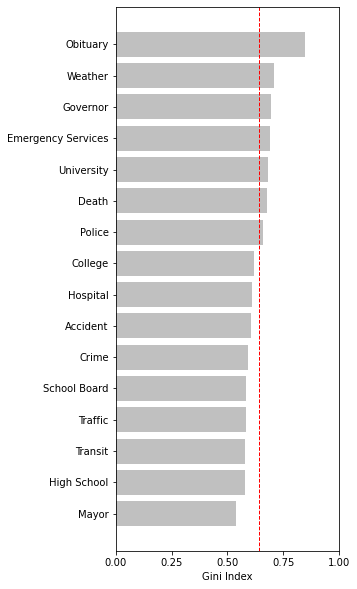

In [170]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,10))
barg= plt.barh([item[0] for item in local_tuple], [item[1] for item in local_tuple], color='silver')
plt.axvline(x=avg_local, color='red', linestyle='dashed', linewidth=1)
plt.xlabel("Gini Index")
x=[0, 0.25,0.50,0.75,1]
plt.xticks(x)
barg

## Step 3: Getting data for National news

In this step we will download the data that was collected by the original researchers of the paper. The data is in r format so we will download it as a CSV file and then use this CSV file which contains all the original data to do our replication. We are doing that here for the national data that has been collected by the researchers. 

In [171]:
df_national = pd.read_csv('national.csv') # also works for Rds

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (13,19,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [123]:
df_national

,Unnamed: 0,term,rank,fips,County,State,source,rank_2,ord_weight,frac_weight,...,website,twitter,youtube,facebook,owner,medium,collection_date,source.y,name,Source_Timestamp
0,0,abortion,1.0,28099.0,Neshoba,MS,usa today,1,100.0,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,today
1,1,abortion,2.0,28099.0,Neshoba,MS,new york times,2,99.0,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 hours ago
2,2,abortion,3.0,28099.0,Neshoba,MS,daily beast,3,98.0,0.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yesterday
3,3,abortion,4.0,28099.0,Neshoba,MS,des moines register,4,97.0,0.250000,...,http://www.desmoinesregister.com,dmregister,http://www.youtube.com/user/DMRegister,https://www.facebook.com/DesMoinesRegister,NaN,Newspapers,2018-08-02 14:55:24.612585,usnpl.com,NaN,yesterday
4,4,abortion,6.0,28099.0,Neshoba,MS,hill,6,95.0,0.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yesterday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8912157,8912157,taxes,48.0,20103.0,Leavenworth,KS,cnycentral.com,46,35.0,0.021739,...,http://www.cnycentral.com,NaN,NaN,NaN,Sinclair,TV station,2018-08-02 14:55:24.612585,sbgi.net,wstq,today
8912158,8912158,taxes,51.0,20103.0,Leavenworth,KS,al.com,49,32.0,0.020408,...,http://www.al.com/birmingham,ALcomBirmingham,NaN,https://www.facebook.com/birminghamnews,NaN,Newspapers,2018-08-02 14:55:24.612585,usnpl.com,birmingham news,yesterday
8912159,8912159,taxes,55.0,20103.0,Leavenworth,KS,vox.com,53,28.0,0.018868,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 days ago
8912160,8912160,taxes,66.0,20103.0,Leavenworth,KS,al.com,64,17.0,0.015625,...,http://www.al.com/birmingham,ALcomBirmingham,NaN,https://www.facebook.com/birminghamnews,NaN,Newspapers,2018-08-02 14:55:24.612585,usnpl.com,birmingham news,2 days ago


We will find each unique term used for queries by using the method `unqiue`  and print the unique search queries.

In [173]:
unique = df_national['term'].unique()

In [174]:
print(df_local.columns)

Index(['Unnamed: 0', 'term', 'fips', 'County', 'State', 'source', 'rank_2',
       'ord_weight', 'frac_weight', 'source_timestamp', 'classification',
       'class_2', 'local_regional', 'state.x', 'total_papers',
       'total_circulation', 'avg_circulation', 'na_circulation', 'median_age',
       'total_population', 'log_population', 'am_indian_pct', 'asian_pct',
       'black_pct', 'hispanic_pct', 'nat_hawaiian_pct', 'white_non_hisp_pct',
       'other_race_pct', 'two_races_pct', 'white_pct', 'hisp_white_pct',
       'hisp_non_white_pct', 'pct_non_white', 'pct_below_pov_lvl_1',
       'pct_below_pov_lvl_2', 'pct_below_pov_lvl', 'pct_no_grade_school',
       'pct_grade_school', 'pct_some_high_school', 'pct_high_school_ged',
       'pct_some_college', 'pct_assoc_deg', 'pct_bach_deg',
       'pct_doctorate_deg', 'pct_master_deg', 'pct_prof_deg',
       'pct_college_deg', 'pct_with_comp_broadband', 'log_papers',
       'state_capital'],
      dtype='object')


### Step 3.1: Get the gini index for the national term: 

In this ste we are using the function we previously defined as `gini_local` to get the national tuple values for each of the unique search queries used. We are defining this set of tuples as `national_tuple` and then we are printing the national tuple to make sure all the queries are correct and have the right values associated with them. 

In [175]:
testtuple = gini_local(df_local)

We are getting the `national_tuple`'s by going through the national data frame and using the previously defined function `gini_local` and getting a list of tuples. 

In [176]:
national_tuple = gini_local(df_national)

In [177]:
national_tuple.sort(key = lambda x: x[1])

We are printing the tuples to make sure they have the correct search term in the format that matches the original research and the right associated gini value (this is a test and it worked) 

In [3]:
#national_tuple

### Step 3.2: Get the average gini value for the national term

In this step we get the average Gini value for the national term. We do this by itterating through the local terms and coefficients of the local tuples. We add all the values associated with the terms in the `national_tuple` and then we divide by the amount of terms to get the average. 

In [179]:
total2=0
for term, coef in national_tuple:
    total2+=coef
avg_national=total2/len(national_tuple)
avg_national

0.8119468480757639

### Step 3.3: Plot the Gini Values for the National Terms 

For this step we used `matplotlib` and used a bar chart to recreate the original graph. 
- Iterate through the local_tuple to get the name, this is item[0] of the tuple
- Iterate through the local_tuple to get the value associated, this is item[1] of the tuple 
- Plot the average as a dashed line by using the average we previously calculated 
- Make sure the x axis gaps match the original by assigning values increasing by +0.25 
- Make sure the x axis is on the right side of the graph to match the style of the original graph by inverting the axis using the `invert_axis` function. 

By using matplotlib and the data we had collected for the Gini index we were able to perfectly recreate the original graph, we made sure to also match the style by using silver for the color of the bars and red dashed line for the average value. 

<BarContainer object of 17 artists>

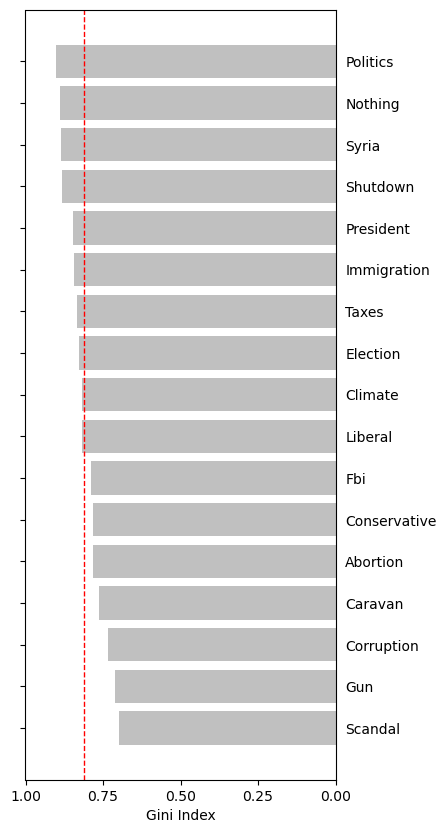

In [211]:
plt.figure(figsize=(4,10))
barg_national= plt.barh([item[0] for item in national_tuple], [item[1] for item in national_tuple], color='silver')
plt.axvline(x=avg_national, color='red', linestyle='dashed', linewidth=1)
plt.xlabel("Gini Index")
x=[0, 0.25,0.50,0.75,1]
plt.xticks(x)
plt.gca().invert_xaxis()
plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
barg_national